# Using Numpy for earthquake data

In [2]:
import glob, os
from obspy import read, Stream
from obspy.core.trace import Stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

### Get list of the folders

In [3]:
cwd = os.getcwd()

In [4]:
dirs = [ name for name in os.listdir(os.getcwd()) if os.path.isdir(os.path.join(os.getcwd(), name)) ]

### Remove unnecessary folder

In [5]:
dirs.remove('.ipynb_checkpoints')

### Get the list of the files inside in a folder

In [6]:
sacs = glob.glob(dirs[0] + '/*')

## Read all sac files 

In [7]:
st_org = Stream()
for sac in sacs:
    st_org += read(sac,format='SAC')

#### Take the 5 second before and after the PGV

In [8]:
selected_data = st_org[0].data[(np.where(st_org[0].data == st_org[0].data.max())[0][0] - 5*st_org[0].stats.sampling_rate).astype(np.int64):(np.where(st_org[0].data == st_org[0].data.max())[0][0] + 5*st_org[0].stats.sampling_rate).astype(np.int64)]

#### Scale the waveform

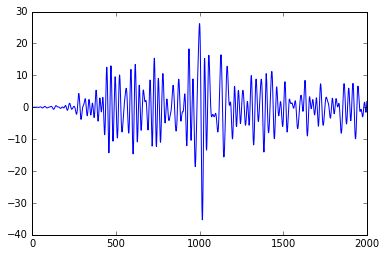

In [9]:
selected_data = selected_data*10**-7
plt.plot(selected_data)

## Make a function to detect the position and the value of the maximum element in an numpy array

In [10]:
def max_pos_finder(data):
  if abs(data.min()) > data.max():
    max_val = max(data.min(), data.max(), key=abs)
    max_pos = np.where(data == max_val)
    max_pos= max_pos[0]
  else:
      max_val = data.max()
      max_pos = np.where(data == max_val)
      max_pos = max_pos[0]     
  return max_val, max_pos[0]

In [11]:
for tr in st_org:
    PGA, PGA_pos = max_pos_finder(tr.data)
    print(tr.id + ' has PGA value of ' + str(PGA*10**-7) + ' cm/s^2 in ' + str(PGA_pos*tr.stats.delta) + ' second')

Seisram.MSCT..HGZ has PGA value of -35.2916096 cm/s^2 in 34.075 second
Seisram.MTL..HGE has PGA value of -67.4533952 cm/s^2 in 38.795 second
Seisram.MSCT..HGE has PGA value of 56.431110399999994 cm/s^2 in 34.230000000000004 second
Seisram.MSCT..HGN has PGA value of -38.856784 cm/s^2 in 34.4 second
Seisram.MTL..HGN has PGA value of 62.9725888 cm/s^2 in 39.975 second
Seisram.MTL..HGZ has PGA value of -34.0885952 cm/s^2 in 41.09 second


### Plot PGA position and value with the earthquake signal

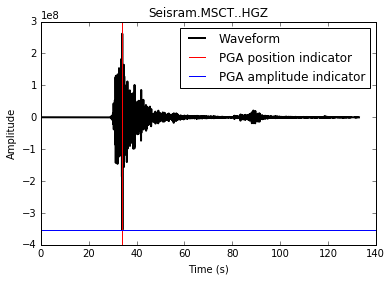

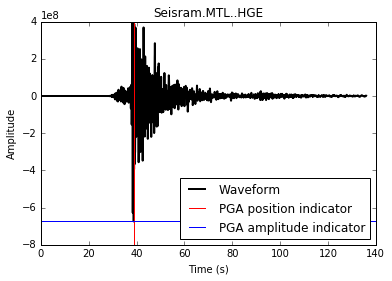

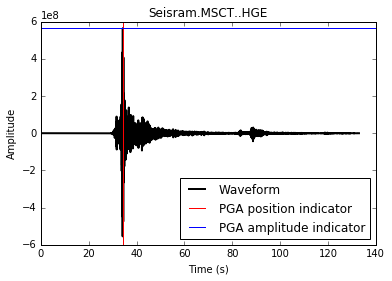

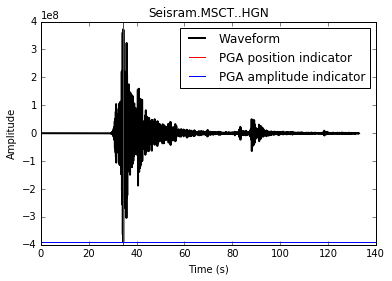

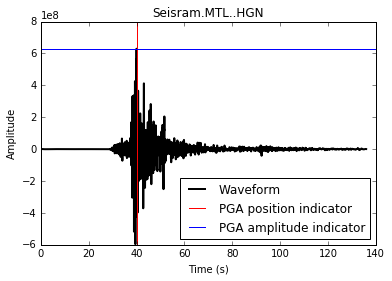

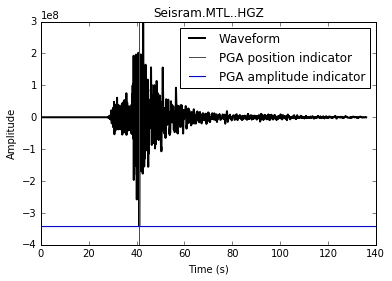

In [12]:
for tr in st_org:
    PGA, PGA_pos = max_pos_finder(tr.data)
    plt.plot(tr.times(),tr.data,color = 'k',linewidth=2,label='Waveform')
    plt.axvline(x=PGA_pos*tr.stats.delta,color='r',label='PGA position indicator')
    plt.axhline(y=PGA,color='b',label='PGA amplitude indicator')
    plt.title(tr.id)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend(loc='best')
    plt.show()